# Matplotlib

[matplotlib](https://matplotlib.org)는 여러 가지 그래프, 곡선, 곡면, 테이블 등을 그릴 수 있는 패키지입니다. 그 중에서도 pyplot 이라는 모듈을 중심적으로 다를 것입니다. Matplotlib의 기능과 세부 옵션들은 정말정말 많기 때문에 (이미지 사이즈, 색, 줄 스타일, 심볼 스타일 등등) 여기서 다루지 못하는 내용이 산더미일 것입니다. 필수적인 요소 외에 세세한 내용은 공식 API 레퍼런스 문서와 구글링을 통해 찾아보는 것이 좋습니다. 그림그리는 코드가 대부분이니까 갖다쓰기도 쉬움

> Matplotlib의 그림그리는 방식은 R과 꽤 유사하고 MATLAB과는 거의 똑같습니다. 나중에 R이나 MATLAB을 배우실 때 개쉬움

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn

iris = seaborn.load_dataset('iris') # 그래프 그리기에 활용할 데이터셋
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 기본적인 그래프 그리기

### Plot

```plot(x, y)```은 같은 길이의 배열 ```x```, ```y```가 주어졌을 때 x에 대한 y의 그래프를 그려주는 함수입니다.

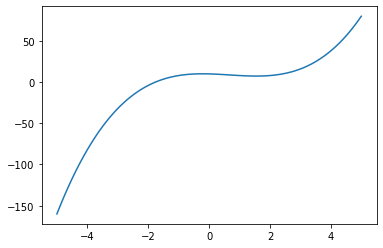

In [2]:
x = np.linspace(-5, 5, 100) # -5 이상 5 이하의 수를 100개로 나눈 배열
y = x ** 3 - 2 * x ** 2 - x + 10
plt.plot(x, y)

그래프 잔뜩 꾸미기

[그래프 꾸미기 공식 doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

* 마커, 선 종류, 색깔 바꾸기

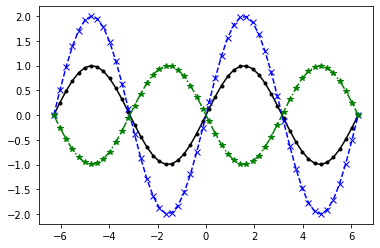

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.sin(x)

plt.plot(x, y, '.-k') # 마커: 점, 선 종류: 실선, 색깔: 검은색
plt.plot(x, 2*y, 'x--b') # 마커: x, 선 종류: 대시선, 색깔: 파랑
plt.plot(x, -y, '*-.g')

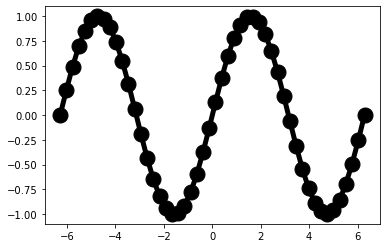

In [4]:
# 같은 방식인데 이번엔 **kwargs 사용하기

plt.plot(x, y, marker='.', markersize=30, linestyle='-', color='k', linewidth=5)
# 이 외에도 엄청 많은 keyword argument가 있음

* 그래프 제목, 축 제목, 격자선, 범례 등

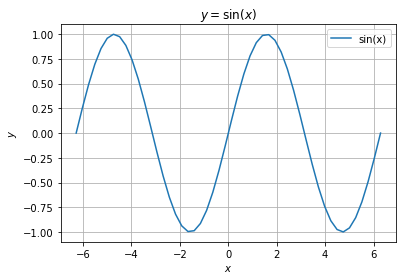

In [5]:
plt.plot(x, y, label='sin(x)') # label 옵션은 범례를 위해
plt.title("$y=\sin(x)$") # 그래프 제목
plt.xlabel('$x$') # x축 제목
plt.ylabel('$y$') # y축 제목
plt.grid(True) # 격자선
plt.legend(loc='upper right') # 범례

* 축 범위 지정, 축 간격 지정

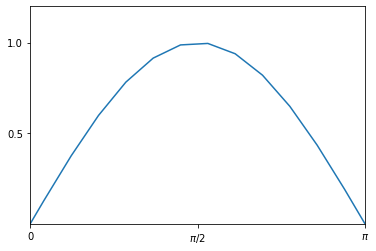

In [6]:
plt.plot(x, y)
plt.xlim(0, np.pi)
plt.ylim(0, 1.2)
plt.xticks([0, np.pi/2, np.pi], labels=['0','$\pi/2$','$\pi$'])
plt.yticks([0.5, 1])
plt.show()

### Scatter

산점도(scatter diagram)는 좌표(x, y)가 주어진 점들을 표시한 그래프입니다.

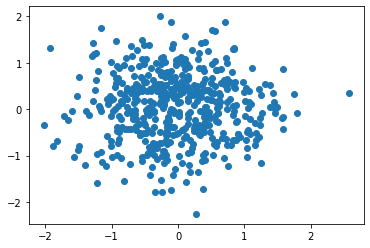

In [7]:
mean = [0, 0]
cov = [[0.5, 0], [0, 0.5]]

x, y = np.random.multivariate_normal(mean, cov, size=500).T # transpose 안하면 에러남
plt.scatter(x, y)

### Box Plot

Box Plot은 최댓값, 최솟값, 제 1, 2, 3 사분위수를 동시에 보여주는 그래프의 일종입니다.

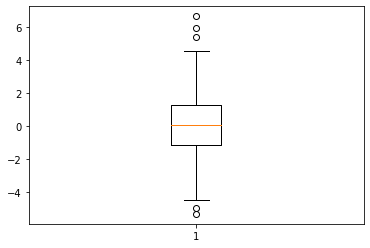

In [8]:
x = np.random.normal(0, 2, 200)
figure = plt.boxplot(x) # 그래프를 보여주는 또다른 방법
plt.show()

### Histogram

히스토그램은 이산 자료의 분포를 알아볼 수 있는 그래프입니다.

(array([ 97., 218., 220., 222., 132.,  66.,  22.,  16.,   6.,   1.]),
 array([0.06477798, 0.45626544, 0.8477529 , 1.23924036, 1.63072783,
        2.02221529, 2.41370275, 2.80519021, 3.19667767, 3.58816513,
        3.97965259]),
 <BarContainer object of 10 artists>)

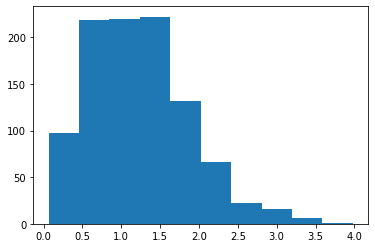

In [9]:
x = np.random.rayleigh(size=1000)
plt.hist(x, bins=10) # bins: 구간 개수

## Subplot: 그래프 여러개 그리기

여러가지 그래프를 한 번에 그리고 싶으면 ```subplot()``` 함수를 사용하면 됩니다. 이 함수는 여러 그래프를 행렬 형태로 배치할 수 있게 해줍니다.

Text(0.5, 0.98, 'Two sine graph')

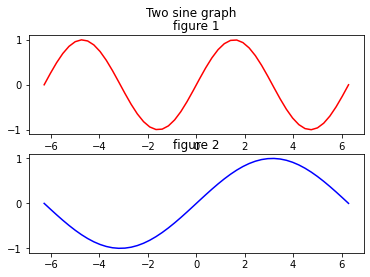

In [10]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)

plt.subplot(2, 1, 1) # 2행 1열 중 1번째
plt.plot(x, np.sin(x), 'r')
plt.title('figure 1')

plt.subplot(2, 1, 2) # 2행 1열 중 2번째
plt.plot(x, np.sin(x/2), 'b')
plt.title('figure 2')

plt.suptitle('Two sine graph')

그런데 이걸 하나하나 다 입력하기 귀찮으니까 그냥 for 루프를 돌립시다

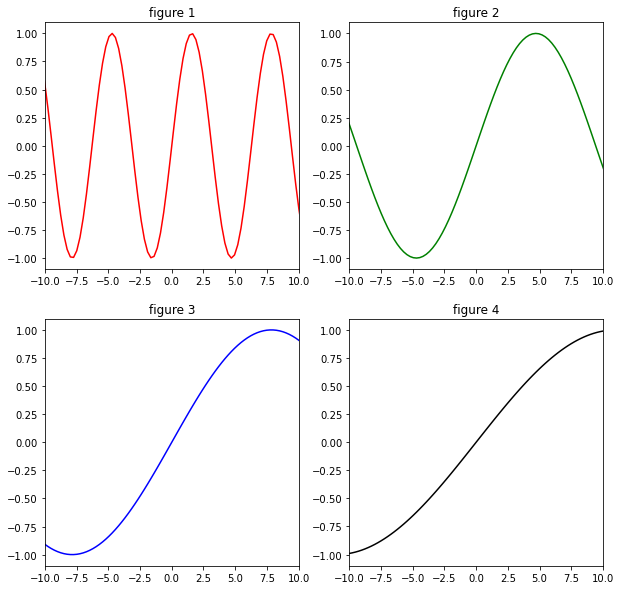

In [11]:
x = np.linspace(-4*np.pi, 4*np.pi, 100)
colors = ['r', 'g', 'b', 'k']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, (ax, color) in enumerate(zip(axes.ravel(), colors)): # 좀 복잡해 보여도 되게 편한 for문임
    ax.plot(x, np.sin(x / (2*i+ 1)), color=color)
    ax.set_title(f'figure {i+1}')
    ax.set_xlim(-10, 10)
